# Régression linéaire

Soit le jeu de donnée suivant. 

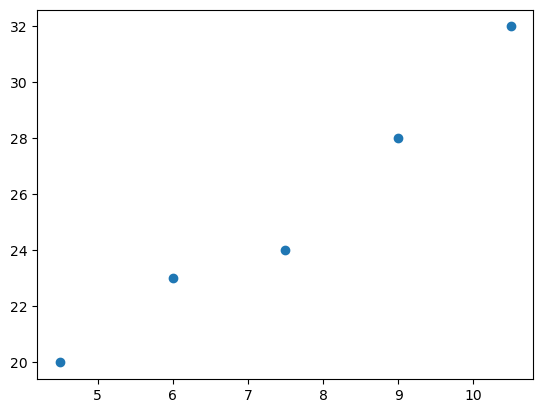

In [22]:
import numpy as np
import matplotlib.pyplot as plt
x = np.array([4.5, 6., 7.5, 9., 10.5])
y = np.array([20, 23, 24, 28, 32])
plt.plot(x,y,'o');

## Formulation matricielle 

On cherche à ajuster une droite sur les données. 

$$y = a x + b$$

On peut définir un vecteur $\bf{ p}$ contenant les deux paramètres inconnus et une matrice $\bf{G}$ 

$$\bf{ p} = \left[ \begin{array}{c} a \\ b\end{array}\right]  \qquad {\bf G} = \left[ \begin{array}{cc} 4.5 & 1\\ 6. & 1\\ 7.5  & 1\\ 9. & 1\\ 10.5 & 1\end{array}\right] $$


## Pseudo-inverse Moore-Penrose

Le vecteur de paramètre minimisant l'écart au carré s'obtient en multipliant les données par le pseudo-inverse de Moore-Penrose :

$${\bf p} = \left( {\bf G^T} {\bf G} \right) ^{-1} {\bf G^T} {\bf y}$$

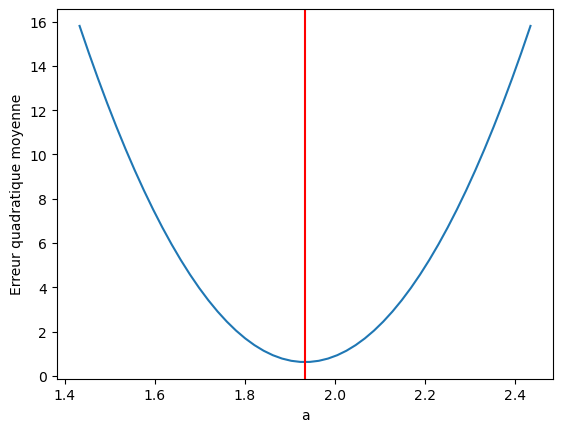

In [5]:

aopt = p[0]

a = np.linspace(aopt-0.5,aopt+0.5)
MSE = np.zeros(len(a))

for i in range(len(a)):
    p = [a[i], 10.9]
    yc = G @ p
    MSE[i] = np.mean( (y - yc)**2 )

plt.plot(a,MSE)
plt.axvline(aopt,color='r')
plt.xlabel('a')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

## Ajustement d'un polynôme 

$$y = a x^3 + b x^2 + c^x + d$$

Il faut adapter la matrice ${\bf G}$ pour prendre en compte les termes supplémentaires.

## Régression non-linéaire

Utilisation du module `optimize`dans `scipy`


Modèle de population avec l'équation logistique :

$$ n(t) = \frac{n_{max}}{1+c \cdot \exp(-rt)}$$
avec 
$$ c = \frac{n_{max}-n_0}{n_0}$$

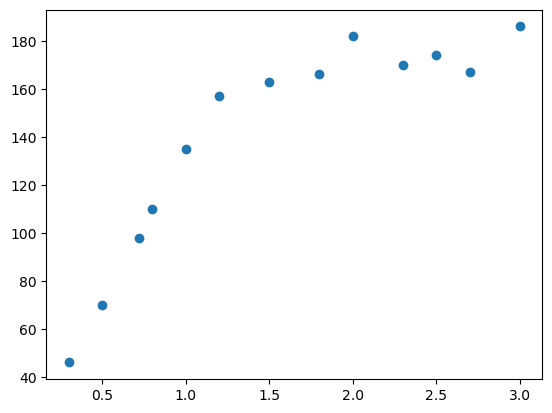

In [9]:
t = np.array((0.3,0.5,0.72,0.8,1,1.2,1.5,1.8,2,2.3,2.5,2.7,3))
n = np.array((46, 70,  98, 110, 135, 157, 163, 166, 182, 170, 174,  167, 186))
plt.plot(t,n,'o');

In [10]:
def logistique(t, n0, nmax, r):
    c = (nmax - n0) / n0
    return nmax / (1 + c * np.exp(-r * t))

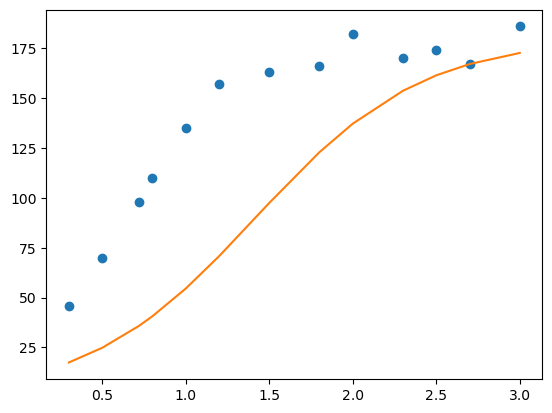

In [23]:
yc = logistique(t, 10, 180, 2)
plt.plot(t,n,'o');
plt.plot(t,yc,'-');

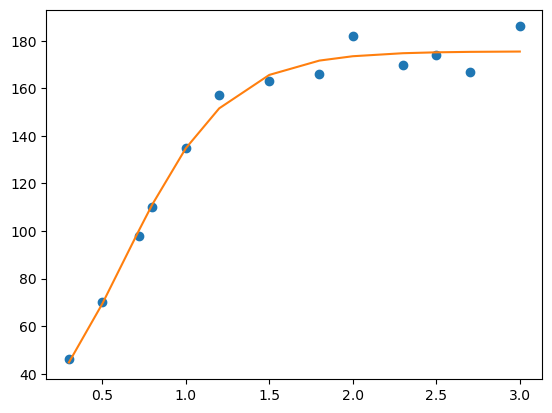

In [20]:
yc = logistique(t, *p)
plt.plot(t,n,'o');
plt.plot(t,yc,'-');